In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import os
import numpy as np
from PIL import Image

# DataGenerator

In [2]:
data_path = '/content/drive/MyDrive/DATASET/image data'
fruit = 'potato'

In [3]:
# Creating Train Data Path for a single Fruit
train_data_path = os.path.join(data_path,"train",fruit)

In [4]:
test_data_path = os.path.join(data_path,"test",fruit)

In [5]:
def load_image_dataset(dataset_directory:str,img_height:int = 224,img_width:int = 224,flatten_image:bool = False):
    """
        Params:
        dataset_directory: path to your dataset directory,
        img_height = standard height of image
        img_width = standard width of image
        flatten_image = False: Image will be returned with actual size
                        True : Image will be flattened

    """

    # Create empty lists to store the images and their corresponding labels
    images = []
    labels = []

    # Iterate through the subdirectories (each subdirectory represents a class)
    for class_name in os.listdir(dataset_directory):
        class_dir = os.path.join(dataset_directory, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = Image.open(image_path)  # Open the image using PIL
            image = image.resize((img_width, img_height))  # Resize the image to a desired size
            image = np.array(image)  # Convert the image to a numpy array
            images.append(image)
            labels.append(class_name)

    # Convert the lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)


    if flatten_image: # flattening image i.e converting image into vector
        images = images.reshape(images.shape[0],-1)

    return images,labels


In [6]:
X_train,y_train = load_image_dataset(dataset_directory=train_data_path,flatten_image=True)

In [7]:
X_test,y_test =  load_image_dataset(dataset_directory=test_data_path,flatten_image=True)

In [8]:
X_train.shape

(1550, 150528)

In [9]:
y_train.shape

(1550,)

In [10]:
import joblib

def save_model(model,fruit:str,filename:str,location:str):

    location = os.path.join(location,fruit)
    if not os.path.isdir(location):
        os.mkdir(location)

    filename = os.path.join(location,filename+".jblib")

    joblib.dump(model,filename=filename)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
from sklearn.metrics import accuracy_score

# Model - 1 Support vector Machine

In [13]:
from sklearn.svm import SVC

model1 = SVC()
model1.fit(X_train, y_train)

SVC()

In [14]:
train_pred1 = model1.predict(X_train)
train_pred1

array(['early blight', 'early blight', 'early blight', ..., 'late blight',
       'late blight', 'late blight'], dtype='<U12')

In [15]:
train_score1=accuracy_score(y_train,train_pred1)
A= round(train_score1, 4)
train_score1

0.9703225806451613

In [16]:
pred1 = model1.predict(X_test)
pred1

array(['early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'late blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       

In [17]:
score1=accuracy_score(y_test,pred1)
a= round(score1, 4)
score1

0.9813953488372092

In [18]:
print("Support vector Machine Confusion matrix: \n\n", confusion_matrix(y_test, pred1))

Support vector Machine Confusion matrix: 

 [[99  0  1]
 [ 0 13  2]
 [ 1  0 99]]


In [19]:
print("Support vector Machine Classification report: \n\n", classification_report(y_test, pred1))
print("Test Accuracy: {}%".format(round(model1.score(X_test, y_test)*100, 2)))

Support vector Machine Classification report: 

               precision    recall  f1-score   support

early blight       0.99      0.99      0.99       100
     healthy       1.00      0.87      0.93        15
 late blight       0.97      0.99      0.98       100

    accuracy                           0.98       215
   macro avg       0.99      0.95      0.97       215
weighted avg       0.98      0.98      0.98       215

Test Accuracy: 98.14%


In [20]:
save_model(model1,fruit=fruit,location="/content/drive/MyDrive/saved",filename="SVM")

# Model -2  Multi-layer Perceptron

In [21]:
from sklearn.neural_network import MLPClassifier

model2 = MLPClassifier()
model2.fit(X_train, y_train)

MLPClassifier()

In [22]:
train_pred2 = model2.predict(X_train)
train_pred2

array(['early blight', 'early blight', 'healthy', ..., 'late blight',
       'late blight', 'late blight'], dtype='<U12')

In [23]:
train_score2=accuracy_score(y_train,train_pred2)
B= round(train_score2, 4)
train_score2

0.9051612903225806

In [24]:
pred2 = model2.predict(X_test)
pred2

array(['healthy', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'healthy', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early bl

In [25]:
score2=accuracy_score(y_test,pred2)
b= round(score2, 4)
score2

0.9209302325581395

In [26]:
print(" Multi-layer Perceptron Confusion matrix: \n\n", confusion_matrix(y_test, pred2))

 Multi-layer Perceptron Confusion matrix: 

 [[98  2  0]
 [ 0  8  7]
 [ 5  3 92]]


In [27]:
print(" Multi-layer Perceptron report: \n\n", classification_report(y_test, pred2))
print("Test Accuracy: {}%".format(round(model2.score(X_test, y_test)*100, 2)))

 Multi-layer Perceptron report: 

               precision    recall  f1-score   support

early blight       0.95      0.98      0.97       100
     healthy       0.62      0.53      0.57        15
 late blight       0.93      0.92      0.92       100

    accuracy                           0.92       215
   macro avg       0.83      0.81      0.82       215
weighted avg       0.92      0.92      0.92       215

Test Accuracy: 92.09%


In [28]:
save_model(model2,fruit=fruit,location="/content/drive/MyDrive/saved",filename="MLP")

# Model -3  AdaBoost

In [29]:
from sklearn.ensemble import AdaBoostClassifier

model3 = AdaBoostClassifier()
model3.fit(X_train, y_train)

AdaBoostClassifier()

In [30]:
train_pred3 = model3.predict(X_train)
train_pred3

array(['early blight', 'early blight', 'late blight', ..., 'late blight',
       'late blight', 'late blight'], dtype='<U12')

In [31]:
train_score3=accuracy_score(y_train,train_pred3)
C= round(train_score3, 4)
train_score3

0.9058064516129032

In [32]:
pred3 = model3.predict(X_test)
pred3

array(['late blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'late blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'late blight',
       'late blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'late blight', 'late blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'late blight',
       'early blight', 'early blight', 'late blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'late blight', 'early blight',
       'early b

In [33]:
score3=accuracy_score(y_test,pred3)
c= round(score3, 4)
score3

0.8697674418604651

In [34]:
print(" AdaBoost Confusion matrix: \n\n", confusion_matrix(y_test, pred3))

 AdaBoost Confusion matrix: 

 [[86  0 14]
 [ 0  9  6]
 [ 5  3 92]]


In [35]:
print(" AdaBoost Classification report: \n\n", classification_report(y_test, pred3))
print("Test Accuracy: {}%".format(round(model3.score(X_test, y_test)*100, 2)))

 AdaBoost Classification report: 

               precision    recall  f1-score   support

early blight       0.95      0.86      0.90       100
     healthy       0.75      0.60      0.67        15
 late blight       0.82      0.92      0.87       100

    accuracy                           0.87       215
   macro avg       0.84      0.79      0.81       215
weighted avg       0.87      0.87      0.87       215

Test Accuracy: 86.98%


In [36]:
save_model(model3,fruit=fruit,location="/content/drive/MyDrive/saved",filename="Ada")

# Model -4 K-nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier


model4= KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
model4.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [38]:
train_pred4 = model4.predict(X_train)
train_pred4

array(['late blight', 'late blight', 'late blight', ..., 'late blight',
       'late blight', 'late blight'], dtype='<U12')

In [39]:
train_score4=accuracy_score(y_train,train_pred4)
D= round(train_score4, 3)
train_score4

0.7870967741935484

In [40]:
pred4= model4.predict(X_test)
pred4

array(['late blight', 'late blight', 'early blight', 'early blight',
       'early blight', 'late blight', 'early blight', 'late blight',
       'early blight', 'late blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'late blight',
       'late blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'late blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'late blight',
       'late blight', 'late blight', 'late blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'late blight', 'late blight', 'early blight', 'late blight',
       'early blight', 'late blight', 'late blight', 'late blight',
       'early blight', 'early blight', 'early blight', 'late blight',
       'late blight', 'late blight', 'early blight', 'early blight',
       'late blight', 'late blight', 'late blight', 'late blight',
       'late blight', 'late bli

In [41]:
score4=accuracy_score(y_test,pred4)
d= round(score4, 4)
score4

0.7627906976744186

In [42]:
print("K-nearest Neighbors Confusion matrix: \n\n", confusion_matrix(y_test, pred4))

K-nearest Neighbors Confusion matrix: 

 [[57  0 43]
 [ 0  8  7]
 [ 0  1 99]]


In [43]:
print("K-nearest Neighbors Classification report: \n\n", classification_report(y_test, pred4))
print("Test Accuracy: {}%".format(round(model4.score(X_test, y_test)*100, 2)))

K-nearest Neighbors Classification report: 

               precision    recall  f1-score   support

early blight       1.00      0.57      0.73       100
     healthy       0.89      0.53      0.67        15
 late blight       0.66      0.99      0.80       100

    accuracy                           0.76       215
   macro avg       0.85      0.70      0.73       215
weighted avg       0.84      0.76      0.75       215

Test Accuracy: 76.28%


In [44]:
save_model(model4,fruit=fruit,location="/content/drive/MyDrive/saved",filename="KNN")

# Model -5 Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

model5= RandomForestClassifier(n_estimators= 150, criterion="gini",verbose=1, random_state=0)
model5.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.0min finished


RandomForestClassifier(n_estimators=150, random_state=0, verbose=1)

In [46]:
train_pred5 = model5.predict(X_train)
train_pred5

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished


array(['early blight', 'early blight', 'early blight', ..., 'late blight',
       'late blight', 'late blight'], dtype='<U12')

In [47]:
train_score5=accuracy_score(y_train,train_pred5)
E= round(train_score5, 4)
train_score5

1.0

In [48]:
pred5= model5.predict(X_test)
pred5

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


array(['early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
      

In [49]:
score5=accuracy_score(y_test,pred5)
e= round(score5, 4)
score5

1.0

In [50]:
print("Random Forest Confusion matrix: \n\n", confusion_matrix(y_test, pred5))

Random Forest Confusion matrix: 

 [[100   0   0]
 [  0  15   0]
 [  0   0 100]]


In [51]:
print(" Random Forest  Classification report: \n\n", classification_report(y_test, pred5))
print("Test Accuracy: {}%".format(round(model5.score(X_test, y_test)*100, 2)))

 Random Forest  Classification report: 

               precision    recall  f1-score   support

early blight       1.00      1.00      1.00       100
     healthy       1.00      1.00      1.00        15
 late blight       1.00      1.00      1.00       100

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215

Test Accuracy: 100.0%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


In [52]:
save_model(model5,fruit=fruit,location="/content/drive/MyDrive/saved",filename="RF")

# Model -6 Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

model6= DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_split=2, min_samples_leaf=1)
model6.fit(X_train, y_train)

DecisionTreeClassifier(splitter='random')

In [54]:
train_pred6 = model6.predict(X_train)
train_pred6

array(['early blight', 'early blight', 'early blight', ..., 'late blight',
       'late blight', 'late blight'], dtype='<U12')

In [55]:
train_score6=accuracy_score(y_train,train_pred6)
F= round(train_score6, 4)
train_score6

1.0

In [56]:
pred6= model6.predict(X_test)
pred6

array(['early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
       'early blight', 'early blight', 'early blight', 'early blight',
      

In [57]:
score6=accuracy_score(y_test,pred6)
f= round(score6, 4)
score6

1.0

In [58]:
print("Decision Tree Confusion matrix: \n\n", confusion_matrix(y_test, pred6))

Decision Tree Confusion matrix: 

 [[100   0   0]
 [  0  15   0]
 [  0   0 100]]


In [59]:
print("Decision Tree Classification report: \n\n", classification_report(y_test, pred6))
print("Test Accuracy: {}%".format(round(model6.score(X_test, y_test)*100, 2)))

Decision Tree Classification report: 

               precision    recall  f1-score   support

early blight       1.00      1.00      1.00       100
     healthy       1.00      1.00      1.00        15
 late blight       1.00      1.00      1.00       100

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215

Test Accuracy: 100.0%


In [60]:
save_model(model6,fruit=fruit,location="/content/drive/MyDrive/saved",filename="DT")

# Comparision Using Box plot

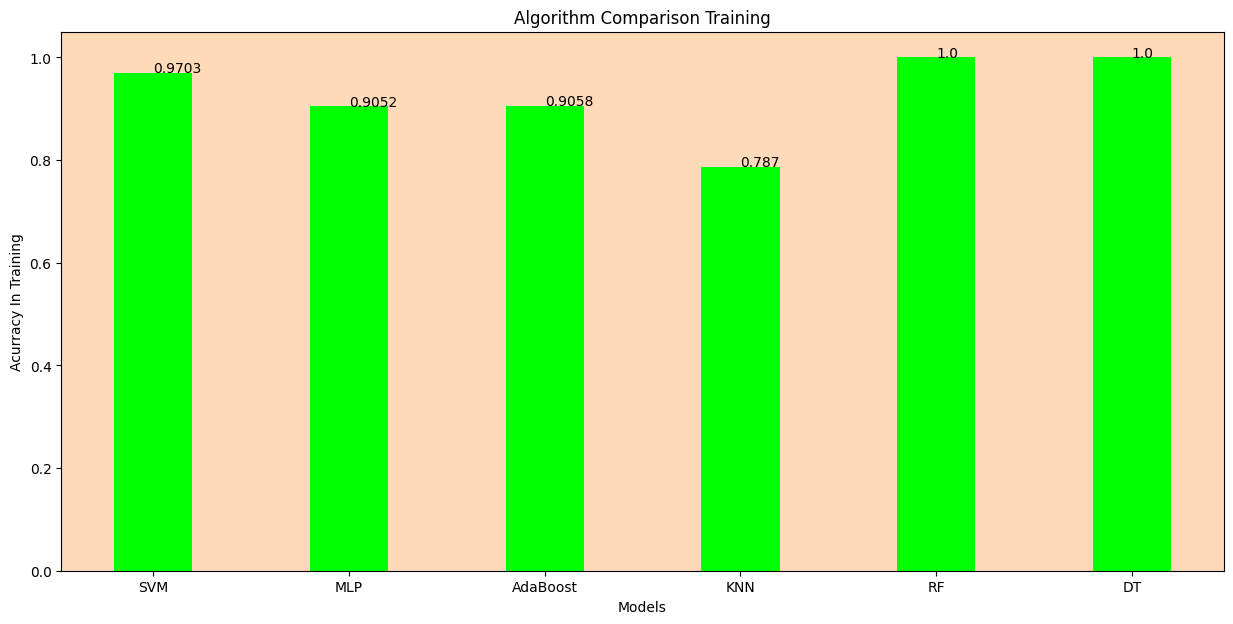

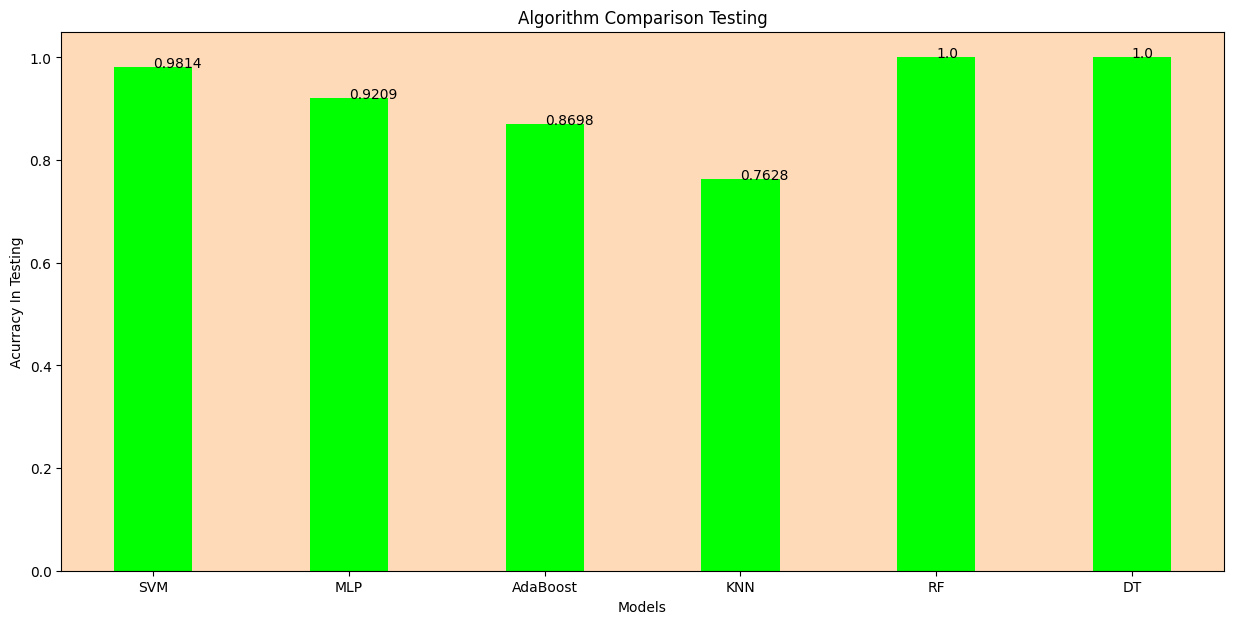

In [61]:
from matplotlib import pyplot as plt

def labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

if __name__ == '__main__':
    x = ['SVM', 'MLP', 'AdaBoost', 'KNN', 'RF', 'DT']
    y = [a, b, c, d, e,f]
    Y = [A, B, C, D, E,F]

    fig = plt.figure(figsize =(15, 7))
    ax = plt.axes()
    ax.set_facecolor("peachpuff")
    plt.bar(x, Y, width=0.4, color='lime')
    labels(x, Y)
    plt.xlabel('Models')
    plt.ylabel("Acurracy In Training")
    plt.title('Algorithm Comparison Training')
    plt.show()

    fig = plt.figure(figsize =(15, 7))
    ax = plt.axes()
    labels(x, y)
    ax.set_facecolor("peachpuff")
    plt.bar( x , y, width=0.4, color='lime')
    plt.xlabel('Models')
    plt.ylabel("Acurracy In Testing")
    plt.title('Algorithm Comparison Testing')
    plt.show()

